In [2]:
!pip install tweet-preprocessor
!pip install textblob
!pip install wordcloud
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import preprocessor as p
import pandas as pd
from textblob import TextBlob
from nltk.stem import PorterStemmer 
from nltk.tokenize import word_tokenize 

In [6]:
data = pd.read_csv('data.csv')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Id         700 non-null    int64  
 1   Text       700 non-null    object 
 2   sentiment  0 non-null      float64
dtypes: float64(1), int64(1), object(1)
memory usage: 16.5+ KB


In [8]:
data.drop(['sentiment'], axis=1, inplace=True)


In [9]:
data.sample(n=5)

,Id,Text
444,1659056025025265665,Tragedi Kanjuruhan Berdampak Besar pada Impian...
673,1657600858497110017,Piala Dunia U20 di Indonesia Batal sebab Alasa...
16,1660835595327885312,"RT @RizkiAsihan: Mau dibawa kemanapun,ke pangg..."
15,1660851551504674821,"RT @RizkiAsihan: Mau dibawa kemanapun,ke pangg..."
290,1659958682850058249,@abendoel90 @Dennysiregar7 Piala Dunia U20 dib...


In [10]:
def preprocessing_data(x):
    return p.clean(x)

def tokenize_data(x):
    return p.tokenize(x)

data['tweet_clean'] = data['Text'].apply(preprocessing_data)
data['tweet_clean'] = data['tweet_clean'].apply(tokenize_data)
data = data.drop_duplicates()

In [11]:
data.sample(n=5)

,Id,Text,tweet_clean
235,1660243296902582274,FIFA coret nama indonesia sebagai tuan rumah p...,FIFA coret nama indonesia sebagai tuan rumah p...
540,1658554498758111232,@tempodotco Selamat dan Sukses GARUDA MUDA IND...,"Selamat dan Sukses GARUDA MUDA INDONESIA, kali..."
306,1659909723775471616,@tvOneNews Jadi Kemunkinan kegagalan kemarin b...,Jadi Kemunkinan kegagalan kemarin bukan karena...
197,1660315273503858693,"RT @RizkiAsihan: Mau dibawa kemanapun,ke pangg...",": Mau dibawa kemanapun,ke panggung apapun,zion..."
63,1660599548077821959,RT @wolfalone93: @MafiaWasit Yang masih menudu...,: Yang masih menuduh Piala Dunia U20 Indonesia...


In [12]:
!pip install -U deep-translator
from deep_translator import GoogleTranslator

translator = GoogleTranslator(source='auto', target='en')

def convert_eng(tweet):
    if tweet is not None and tweet != "":
        return translator.translate(tweet)
    else:
        return ""

# Check if 'tweet_clean' column exists
if 'tweet_clean' in data.columns:
    # Fill missing values in 'tweet_clean' column
    data['tweet_clean'] = data['tweet_clean'].fillna("")
    
    # Apply translation
    data['tweet_english'] = data['tweet_clean'].apply(convert_eng)
else:
    print("Error: 'tweet_clean' column does not exist.")


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [13]:
data.sample(n=5)

,Id,Text,tweet_clean,tweet_english
165,1660426929655394304,"RT @RizkiAsihan: Mau dibawa kemanapun,ke pangg...",": Mau dibawa kemanapun,ke panggung apapun,zion...",": Want to be taken anywhere, to any stage, inh..."
648,1657781279746842627,Indra Sjafri Coba Hidupkan Sepak Bola Indonesi...,Indra Sjafri Coba Hidupkan Sepak Bola Indonesi...,Indra Sjafri Trying to Revive Indonesian Footb...
8,1660894999054286849,"Pertama, kata Adjie, turunnya elektabilitas Ga...","Pertama, kata Adjie, turunnya elektabilitas Ga...","First, said Adjie, the decline in the electabi..."
405,1659405483449651200,Imbas dari kerusuhan yang terjadi di Kanjuruha...,Imbas dari kerusuhan yang terjadi di Kanjuruha...,As a result of the riots that occurred in Kanj...
176,1660405950828904448,"RT @RizkiAsihan: Mau dibawa kemanapun,ke pangg...",": Mau dibawa kemanapun,ke panggung apapun,zion...",": Want to be taken anywhere, to any stage, inh..."


In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [15]:
ps = PorterStemmer()

def stemming_data(x):
    return ps.stem(x)

# Check if 'tweet_english' column exists
if 'tweet_english' in data.columns:
    # Apply stemming operation
    data['tweet_english'] = data['tweet_english'].apply(stemming_data)
else:
    print("Error: 'tweet_english' column does not exist.")


In [16]:
data_tweet = list(data['tweet_english'])
polaritas = 0

status = []
total_positif = total_negatif = total_netral = total = 0

for i, tweet in enumerate(data_tweet):
    analysis = TextBlob(tweet)
    polaritas += analysis.polarity

    if analysis.sentiment.polarity > 0.0:
        total_positif += 1
        status.append('Positif')
    elif analysis.sentiment.polarity == 0.0:
        total_netral += 1
        status.append('Netral')
    else:
        total_negatif += 1
        status.append('Negatif')

    total += 1 
    
print(f'Hasil Analisis Data:\nPositif = {total_positif}\nNetral = {total_netral}\nNegatif = {total_negatif}')
print(f'\nTotal Data : {total}')

Hasil Analisis Data:
Positif = 214
Netral = 177
Negatif = 309

Total Data : 700


In [17]:
status = pd.DataFrame({'klasifikasi': status})
data['klasifikasi'] = status
data.tail()

,Id,Text,tweet_clean,tweet_english,klasifikasi
695,1657557945490747393,@ganjarpranowo ada andil besar anda dalam kega...,ada andil besar anda dalam kegagalan penyeleng...,you played a big part in the failure of organi...,Negatif
696,1657535770398453760,@ganjarpranowo Kembalikan dulu status tuan rum...,Kembalikan dulu status tuan rumah piala dunia ...,return first to the status of hosting the u20 ...,Positif
697,1657528723510550530,@ganjarpranowo Setelah melakukan VC dengan pel...,Setelah melakukan VC dengan pelatih maupun pem...,after conducting vc with coaches and indonesia...,Positif
698,1657524582595837954,Caper mulu ngntd. Masyarakat masih gak akan lu...,Caper mulu ngntd. Masyarakat masih gak akan lu...,caper mulu ngntd. the public will still not fo...,Netral
699,1657453177590120448,@ganjarpranowo Padahal waktu itu pemain U20 be...,Padahal waktu itu pemain U20 berkesempatan mai...,even though at that time the u20 players had t...,Positif


In [18]:
from wordcloud import WordCloud, STOPWORDS

def plot_cloud(wordcloud):
    plt.figure(figsize=(12, 8))
    plt.imshow(wordcloud) 
    plt.axis("off");

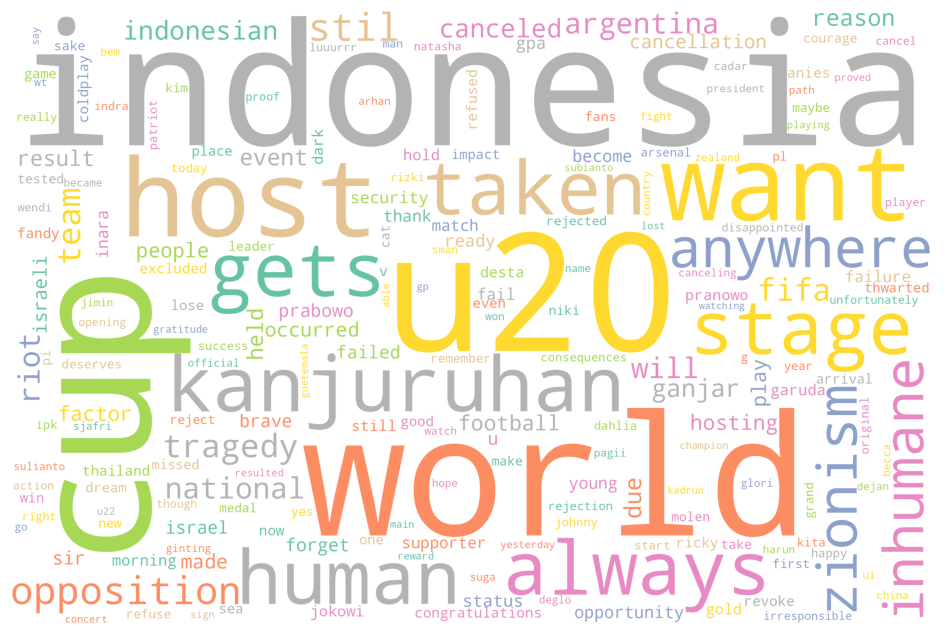

In [19]:
all_words = ' '.join([tweets for tweets in data['tweet_english']])
wordcloud = WordCloud(width = 3000, height = 2000, random_state=3, background_color='white', colormap='Set2', collocations=False, stopwords = STOPWORDS).generate(all_words)
plot_cloud(wordcloud)

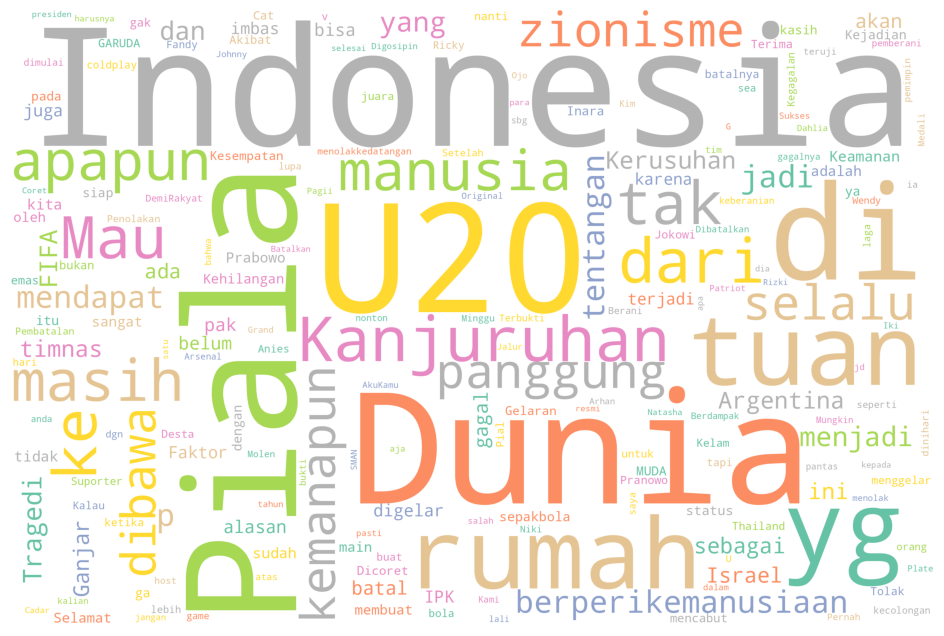

In [20]:
all_words = ' '.join([tweets for tweets in data['tweet_clean']])
wordcloud = WordCloud(width = 3000, height = 2000, random_state=3, background_color='white', colormap='Set2', collocations=False, stopwords = STOPWORDS).generate(all_words)
plot_cloud(wordcloud)

In [21]:
def show_pie(label, data, legend_title) :
    fig, ax = plt.subplots(figsize=(8, 10), subplot_kw=dict(aspect='equal'))

    labels = [x.split()[-1] for x in label]

    def func(pct, allvals):
        absolute = int(pct/100.*np.sum(allvals))
        return "{:.1f}% ({:d})".format(pct, absolute)

    wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data), 
                                      textprops=dict(color="w"))

    ax.legend(wedges, labels,
              title= legend_title,
              loc="center left",
              bbox_to_anchor=(1, 0, 0.5, 1))

    plt.setp(autotexts, size=10, weight="bold")
    plt.show()

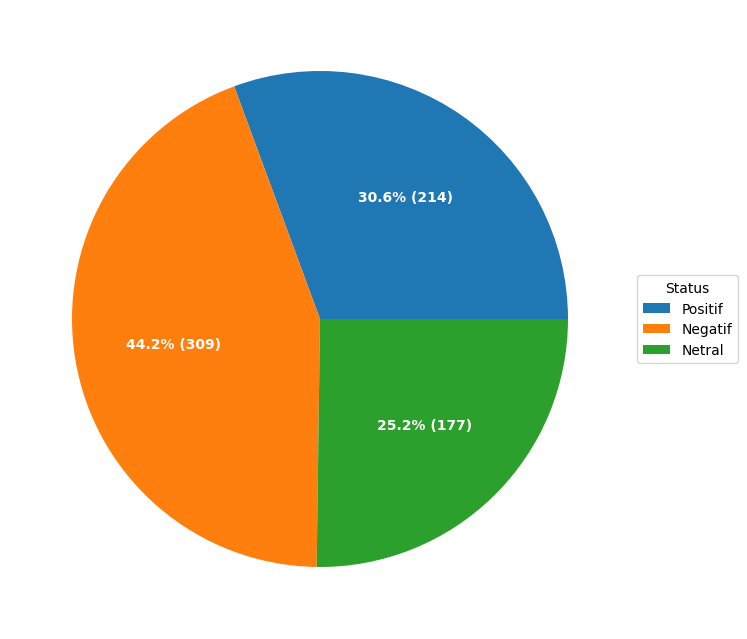

In [22]:
label = ['Positif', 'Negatif', 'Netral']
count_data = [total_positif+1, total_negatif+1, total_netral]

show_pie(label, count_data, "Status")

In [24]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [25]:
dataset = data.drop(['Id','Text', 'tweet_clean'], axis=1, inplace=False)
dataset = [tuple(x) for x in dataset.to_records(index=False)]

In [26]:
import random

set_positif = []
set_negatif = [] 
set_netral = []

for n in dataset:
    if(n[1] == 'Positif'):
      set_positif.append(n)
    elif(n[1] == 'Negatif'):
      set_negatif.append(n)
    else: 
      set_netral.append(n)

set_positif = random.sample(set_positif, k=int(len(set_positif)/2))
set_negatif = random.sample(set_negatif, k=int(len(set_negatif)/2))
set_netral = random.sample(set_netral, k=int(len(set_netral)/2))

train = set_positif + set_negatif + set_netral

train_set = []

for n in train:
     train_set.append(n)

In [27]:
from textblob.classifiers import NaiveBayesClassifier
cl = NaiveBayesClassifier(train_set)
print('Akurasi Test:', cl.accuracy(dataset))

Akurasi Test: 0.8457142857142858


In [28]:
data_tweet = list(data['tweet_english'])
polaritas = 0

status = []
total_positif = total_negatif = total_netral = total = 0

for i, tweet in enumerate(data_tweet):
    analysis = TextBlob(tweet, classifier=cl)

    if analysis.classify() == 'Positif':
        total_positif += 1
    elif analysis.classify() == 'Netral':
        total_netral += 1
    else:
        total_negatif += 1
    
    status.append(analysis.classify())
    total += 1 
    
print(f'\nHasil Analisis Data:\nPositif = {total_positif}\nNetral = {total_netral}\nNegatif = {total_negatif}')
print(f'\nTotal Data : {total}')


Hasil Analisis Data:
Positif = 241
Netral = 216
Negatif = 243

Total Data : 700


In [29]:
status = pd.DataFrame({'klasifikasi_bayes': status})
data['klasifikasi_bayes'] = status

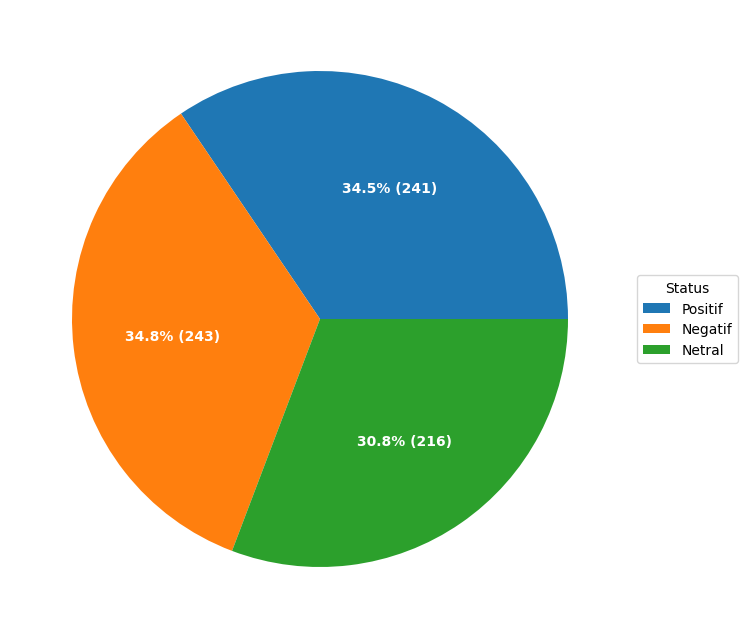

In [30]:
label = ['Positif', 'Negatif', 'Netral']
count_data = [total_positif+1, total_negatif+1, total_netral]

show_pie(label, count_data, "Status")